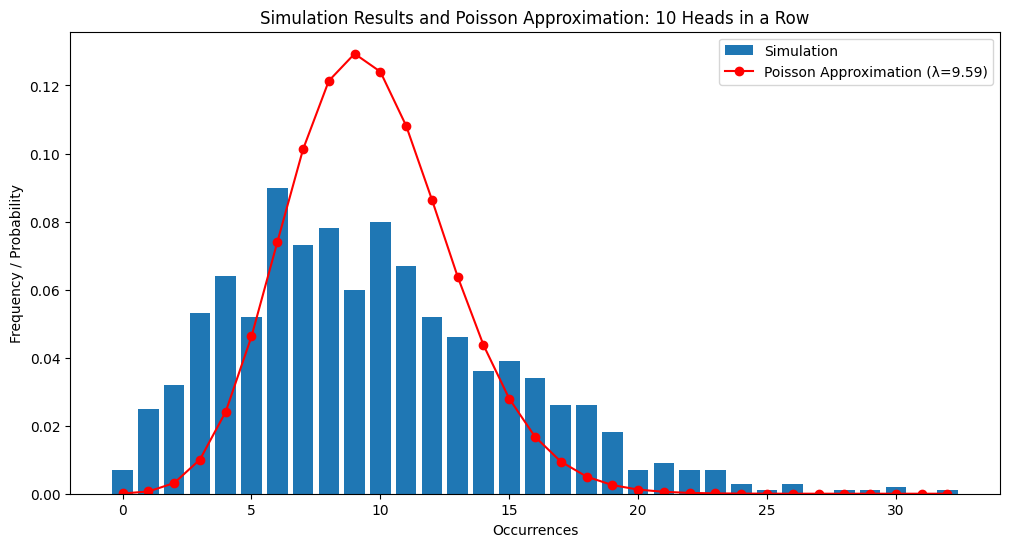

Average occurrences in simulation: 9.591


In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

def simulate_coin_flips(num_flips):
    """Simulates coin flips and counts occurrences of 10 heads in a row."""
    flips = [random.choice([0, 1]) for _ in range(num_flips)]  # 0: tails, 1: heads
    occurrences = 0
    for i in range(num_flips - 9):
        if flips[i:i + 10] == [1] * 10:
            occurrences += 1
    return occurrences

def run_simulation(num_trials, num_flips):
    """Runs multiple simulations and returns a list of occurrences."""
    occurrences = [simulate_coin_flips(num_flips) for _ in range(num_trials)]
    return occurrences

def poisson_approximation(occurrences):
    """Calculates the Poisson distribution approximation."""
    average_occurrences = np.mean(occurrences)
    max_occurrences = max(occurrences)
    poisson_probs = poisson.pmf(range(max_occurrences + 1), average_occurrences)
    return poisson_probs, average_occurrences, max_occurrences

# Simulation parameters
num_trials = 1000  # Number of simulation runs
num_flips = 10000  # Number of coin flips per simulation

# Run the simulation
occurrences = run_simulation(num_trials, num_flips)

# Poisson approximation
poisson_probs, average_occurrences, max_occurrences = poisson_approximation(occurrences)

# Plotting
plt.figure(figsize=(12, 6))

# Histogram of simulation results with Poisson distribution overlay
plt.hist(occurrences, bins=range(max(occurrences) + 2), align='left', rwidth=0.8, density=True, label="Simulation")
plt.plot(range(max_occurrences + 1), poisson_probs, 'ro-', label=f"Poisson Approximation (λ={average_occurrences:.2f})")
plt.title("Simulation Results and Poisson Approximation: 10 Heads in a Row")
plt.xlabel("Occurrences")
plt.ylabel("Frequency / Probability")
plt.legend()
plt.show()

print(f"Average occurrences in simulation: {average_occurrences}")
